 This notebook is a project for the Data Analysis with Python course by IBM on Coursera.

## Part 1- Data Wrangling

The objectives of this section are:

 - Handling missing data
 - Normalizing
 - Visualizing the data as grouped bar graph using Binning
 - Cnverting a categorical data into numerical indicator variables

The following commented lines are used to download the "laptops.csv" file. If the file already exists, there is no need to run the folloing cell.

In [ ]:
# import requests

# URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
# file_name = "laptops.csv"
# response = requests.get(URL)
# with open(file_name, "wb") as f:
#     f.write(response.content)

In [ ]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load data into a pandas DataFrame
file_name="laptops.csv"
df = pd.read_csv(file_name, header=0)
df.info()

The first column is an index from the csv file and can be dropped.

In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)

### Evaluating the dataset for missing data

In [ ]:
missing_data_df = df.isnull()
# for column in missing_data.columns.values.tolist():
for column in missing_data_df.columns:
    entry_count = missing_data_df[column].value_counts().iloc[0]
    if entry_count != missing_data_df.shape[0]:
        print(column, "\t", missing_data_df.shape[0] - entry_count, "missing value(s)")

In [ ]:
# Checking if the dtype of these columns is float
df[["Screen_Size_cm", "Weight_kg"]].dtypes

Values in "Weight_kg" attribute are continuous in nature. The missing values are replaced by the average value of the attribute.

In [ ]:
df["Weight_kg"].replace(np.nan, df["Weight_kg"].mean(), inplace=True)

Missing values in attributes that have categorical data, such as "Screen_Size_cm", are best replaced using the most frequent value.

In [ ]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

### Data Normalization

In [ ]:
# Normalizing the "CPU_frequency" attribute with respect to the maximum value
print(df["CPU_frequency"].dtypes)
df["CPU_frequency"] = df["CPU_frequency"] / df["CPU_frequency"].max()

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. The attribute price is considered in 3 bins, named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

In [ ]:
print(df["Price"].dtypes)
# price_bins = np.linspace(df["Price"].min(), df["Price"].max(), 4)
# group_names = ['Low', 'Medium', 'High']
# df['Price-binned'] = pd.cut(df['Price'], price_bins, labels=group_names, include_lowest=True )
df.head()

In [ ]:
# plt.bar(group_names, df["Price-binned"].value_counts())
# plt.xlabel("Price")
# plt.ylabel("count")
# plt.title("Price bins")

Converting the "Screen" attribute into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD".

In [ ]:
dummy = pd.get_dummies(df["Screen"])
dummy.rename(columns={'IPS Panel': 'Screen-IPS_panel', 'Full HD': 'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy], axis=1)
df.drop("Screen", axis = 1, inplace=True)
df.head()

## Part 2- Exploratory Data Analysis

The objectives of this section are:
 - Visualizing individual feature patterns
 - Running descriptive statistical analysis
 - Using groups and pivot tables to find the effect of categorical variables on price
 - Using Pearson Correlation to measure the interdependence between variables

In [ ]:
import seaborn as sns
from scipy import stats

# Descriptive Statistical Analysis

In [ ]:
print(df.describe())
print(df.describe(include=['object']))

# Visualizing individual feature patterns
For continuous variables, generating regression plots for "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".

In [ ]:
fig, axes = plt.subplots(1, 3)
for k, feature in enumerate(["CPU_frequency", "Screen_Size_cm", "Weight_kg"]):
    sns.regplot(x=feature, y="Price", data=df, ax=axes[k])
fig.set_size_inches([12.8, 4.8])
df[["CPU_frequency", "Screen_Size_cm", "Weight_kg", "Price"]].corr()

"CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


For categorical features, generating Box plots for "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD".

In [ ]:
fig, axes = plt.subplots(2, 3)
for k, feature in enumerate(["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]):
    sns.boxplot(x=feature, y="Price", data=df, ax=axes[k//3, np.mod(k, 3)])
fig.set_size_inches([2*6.4, 1.5*4.8])

# GroupBy and Pivot Tables
Grouping "GPU", "CPU_core" and "Price" to make a pivot table and visualizing the connection.

In [ ]:
df_grouped = df[["GPU", "CPU_core", "Price"]].groupby(["GPU", "CPU_core"], as_index=False).mean()
df_grouped

In [ ]:
grouped_pivot = df_grouped.pivot(index='GPU', columns='CPU_core')
grouped_pivot

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
ax.set_xlabel("CPU cores")
ax.set_ylabel("GPU")

fig.colorbar(im)

Evaluating the Pearson Coefficient and the p-values for each parameter to determine the features with most effect on the price

In [11]:
for param in ['Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm', 'CPU_frequency',
              'RAM_GB', 'Storage_GB_SSD', 'Weight_kg']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("Pearson Correlation Coefficient = ", pearson_coef, "\t p-value = ", p_value)
    print()

Category
Pearson Correlation Coefficient =  0.2862427558126411 	 p-value =  7.2256962358084185e-06

GPU
Pearson Correlation Coefficient =  0.28829819888814257 	 p-value =  6.16694969836594e-06

OS
Pearson Correlation Coefficient =  -0.2217298011482737 	 p-value =  0.0005696642559248124

CPU_core
Pearson Correlation Coefficient =  0.4593977773355116 	 p-value =  7.912950127011088e-14

Screen_Size_cm
Pearson Correlation Coefficient =  -0.11064420817118295 	 p-value =  0.0885339784683266

CPU_frequency
Pearson Correlation Coefficient =  0.3666655589258862 	 p-value =  5.502463350714563e-09

RAM_GB
Pearson Correlation Coefficient =  0.5492972971857846 	 p-value =  3.681560628843529e-20

Storage_GB_SSD
Pearson Correlation Coefficient =  0.24342075521810302 	 p-value =  0.00014898923191727792

Weight_kg
Pearson Correlation Coefficient =  -0.05031225837751543 	 p-value =  0.4397693853434932



## Part 3- Model Development
# Objectives
 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R-squared parameters

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Single Linear Regression
Createing a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [37]:
X, Y  = (df[["CPU_frequency"]], df["Price"])
lm1 = LinearRegression()
lm1.fit(X, Y)

Y_pred = lm1.predict(X)

Generating the distribution plot for the predicted values and that of the actual values.

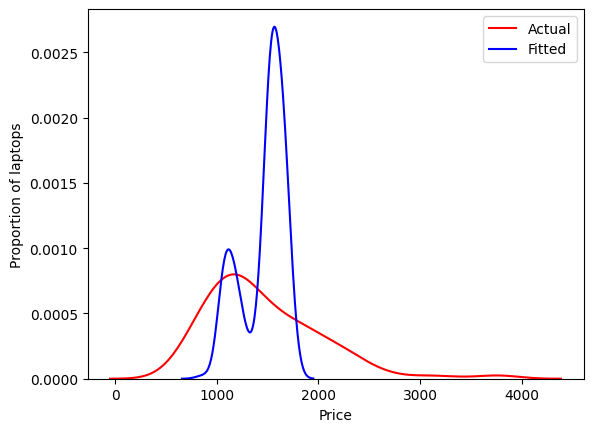

In [38]:
ax1 = sns.kdeplot(Y, color="r", label="Actual")
sns.kdeplot(Y_pred, color="b", label="Fitted" , ax=ax1)

plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend()

Evaluating the MSE and $R^2$ score values for the model.

In [42]:
mse_slr = mean_squared_error(Y, Y_pred)
r2_slr = r2_score(Y, Y_pred)
# r2_slr = lm1.score(X, Y)
print('R-squared for Linear Regression is: ', r2_slr)
print('MSE of price and predicted value is: ', mse_slr)

R-squared for Linear Regression is:  0.1344436321024326
MSE of price and predicted value is:  284583.4405868629


# Multiple Linear Regression
The parameters with a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Using all these variables to create a Multiple Linear Regression system.

In [40]:
X_mlr = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
lm2 = LinearRegression()
lm2.fit(X_mlr, Y)

Y_pred_mlr = lm2.predict(X_mlr)

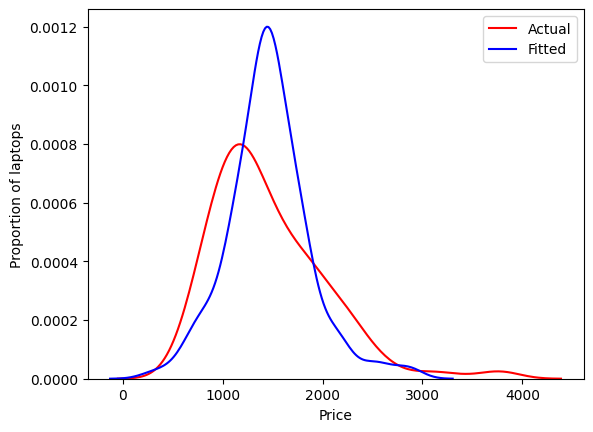

In [49]:
ax2 = sns.kdeplot(Y, color="r", label="Actual")
sns.kdeplot(Y_pred_mlr, color="b", label="Fitted" , ax=ax2)

plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend()

In [44]:
mse_mlr = mean_squared_error(Y, Y_pred_mlr)
r2_mlr = r2_score(Y, Y_pred_mlr)
print('R-squared for Multiple Regression is: ', r2_mlr)
print('MSE of price and predicted value is: ', mse_mlr)

R-squared for Multiple Regression is:  0.5082509055187374
MSE of price and predicted value is:  161680.57263893107


# Polynomial Regression and Pipeline
Creating a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression.

In [63]:
#  Write your code below and press Shift+Enter to execute
Input = [('scale', StandardScaler()),
         ('polynomial', PolynomialFeatures(degree=3, include_bias=False)),
         ('model', LinearRegression())]
pipe = Pipeline(Input)
Z = X_mlr.astype(float)
pipe.fit(Z, Y)
Y_pred_pipe = pipe.predict(Z)

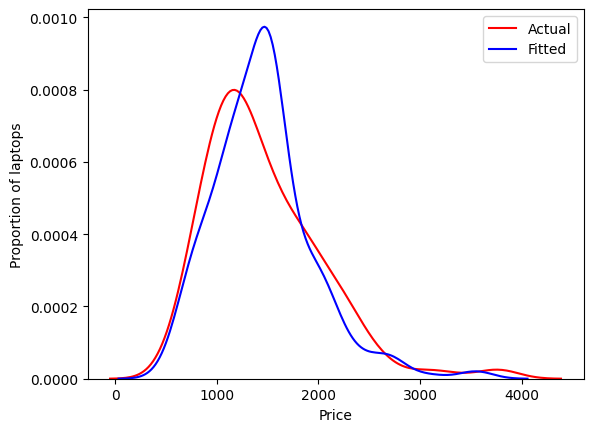

In [64]:
ax3 = sns.kdeplot(Y, color="r", label="Actual")
sns.kdeplot(Y_pred_pipe, color="b", label="Fitted" , ax=ax3)

plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend()

In [65]:
mse_pipe = mean_squared_error(Y, Y_pred_pipe)
r2_pipe = r2_score(Y, Y_pred_pipe)
print('R-squared for Multiple Regression is: ', r2_pipe)
print('MSE of price and predicted value is: ', mse_pipe)

R-squared for Multiple Regression is:  0.7255452042965074
MSE of price and predicted value is:  90237.09251493566
